# Pandas로 국민청원 데이터 분석하기

## Pandas와 NumPy를 import해 옵니다.

In [1]:
import pandas as pd
import numpy as np

## csv 데이터를 불러 옵니다.

In [2]:
df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', parse_dates=['start', 'end'])

## 읽어온 데이터가 몇 행 몇 열인지 봅니다.

In [3]:
df.shape

(211108, 8)

## 일부 데이터 미리 보기
* 상단 5개의 데이터를 불러옵니다.

In [4]:
df.head(5)

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


* 하단 3개의 데이터를 불러옵니다.

In [5]:
df.tail(3)

,article_id,start,end,answered,votes,category,title,content
211105,272626,2018-06-16,2018-07-16,0,2,일자리,선거참여원 70000원 노동법 위반아닌가요,최저임금 올려주시고 선거지원 아르바이트 사원은 식대 빼고 70000원 말이 되는건가...
211106,272627,2018-06-16,2018-07-16,0,12,기타,우체국 집배원 도 대한민국 국민입니다,우체국 직원분들도 대한민국 국민입니다\n글을 보며 읽고 읽는데 말도 안되는 소리 하...
211107,272628,2018-06-16,2018-07-16,0,5,정치개혁,"역적 최순실의 모든 재산을 몰수할 것이며, 역적 박근혜를 즉각 사사(죽일 죄인을 예...","이 청원자는 천주교인이며, 세례명은 ""남종삼세례자요한""입니다.\n일전에도 수많은 국..."


## 결측치가 있는지 확인해 봅니다.

In [6]:
df.isnull().sum()

article_id    0
start         0
end           0
answered      0
votes         0
category      0
title         0
content       1
dtype: int64

## 데이터 요약하기
* 어떤 컬럼이 있고 어떤 타입인지 출력해 봅니다.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211108 entries, 0 to 211107
Data columns (total 8 columns):
article_id    211108 non-null int64
start         211108 non-null datetime64[ns]
end           211108 non-null datetime64[ns]
answered      211108 non-null int64
votes         211108 non-null int64
category      211108 non-null object
title         211108 non-null object
content       211107 non-null object
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 12.9+ MB


* 데이터 타입만 따로 뽑아 봅니다.

In [8]:
df.dtypes

article_id             int64
start         datetime64[ns]
end           datetime64[ns]
answered               int64
votes                  int64
category              object
title                 object
content               object
dtype: object

* 컬럼명만 따로 추출해 봅니다.

In [9]:
df.columns

Index(['article_id', 'start', 'end', 'answered', 'votes', 'category', 'title',
       'content'],
      dtype='object')

* 수치형 데이터에 대한 요약을 봅니다.

In [10]:
df.describe()

,article_id,answered,votes
count,211108.000000,211108.000000,211108.000000
mean,126829.174299,0.000128,146.589082
std,79425.907385,0.011308,4587.667181
min,21.000000,0.000000,0.000000
25%,54803.750000,0.000000,1.000000
50%,126518.500000,0.000000,3.000000
75%,193946.250000,0.000000,10.000000
max,272628.000000,1.000000,714875.000000


* 카테고리(object) 형태의 데이터에 대한 요약을 봅니다.

In [11]:
df.describe(include=np.object)

,category,title,content
count,211108,211108,211107
unique,17,176185,196019
top,정치개혁,이명박 출국금지,이명박 출국금지
freq,38909,3018,597


## 답변대상 청원 보기
20만건 이상 투표를 받으면 답변 대상 청원이 됩니다.<br/>20만건 이상 투표를 받은 청원의 갯수를 세어보세요.

In [35]:
df_20 = df.loc[df['votes'] > 200000]
df_20.shape

(43, 14)

In [42]:
df_20.category.value_counts()

인권/성평등         11
안전/환경           5
문화/예술/체육/언론     5
기타              5
외교/통일/국방        3
정치개혁            3
성장동력            2
경제민주화           2
보건복지            2
행정              1
반려동물            1
교통/건축/국토        1
미래              1
육아/교육           1
Name: category, dtype: int64

In [38]:
df_20[['title', 'content']].head(3)

,title,content
1752,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...
10894,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!
18111,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...


* 20만건 이상 투표를 받은 상위 5개의 청원을 head()를 통해 출력해 보세요.

In [13]:
df_20_loc = df.loc[df_20]
df_20_loc.sort_values(by='votes', ascending=False).head()

,article_id,start,end,answered,votes,category,title,content
208597,269548,2018-06-13,2018-07-13,0,714875,외교/통일/국방,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ...",2012년 난민법 제정으로 인해 외국인은 한달 무비자로 입국할 수 있으나 난민신청자...
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!
118970,142600,2018-02-19,2018-03-21,1,614127,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다","오늘 여자 단체전 팀추월에서 김보름, 박지우 선수는 팀전인데도 불구하고 개인의 영달..."
183791,230552,2018-05-11,2018-06-10,1,419006,인권/성평등,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...
91882,105105,2018-01-20,2018-02-19,1,360905,외교/통일/국방,나경원 의원 평창올림픽 위원직을 파면시켜주세요,안녕하세요. 청와대에 청원은 처음해 보는 경험인지라 조금은 어색하고 뭐라 말을 시작...


* 20만건 이상 투표를 받은 청원을 별도의 컬럼을 만들어 줍니다. 컬럼 이름은 `answer`로 합니다.

In [14]:
df['answer'] = (df['votes'] > 200000) == 1

* df 데이터프레임의 크기를 다시 찍어 보세요. 컬럼 하나가 늘었나요?

In [15]:
df.shape

(211108, 9)

In [16]:
df.dtypes

article_id             int64
start         datetime64[ns]
end           datetime64[ns]
answered               int64
votes                  int64
category              object
title                 object
content               object
answer                  bool
dtype: object

* 새로 생성해 준 answer의 타입은 boolean 타입입니다. int로 변경해 보세요.

In [17]:
df['answer'] = df['answer'].astype('int')

* 답변대상 청원중 아직 답변되지 않은 청원의 수를 계산해 보세요.

In [45]:
df['answer_diff'] = df['answer'] - df['answered']
df['answer_diff'].sum()

16

## 답변 대상 청원 중 투표를 가장 많이 받은 것

In [19]:
answered_df = df.loc[df['answer'] == 1]
answered_df.sort_values('votes', ascending=False).head(5)

,article_id,start,end,answered,votes,category,title,content,answer,answer_diff
208597,269548,2018-06-13,2018-07-13,0,714875,외교/통일/국방,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ...",2012년 난민법 제정으로 인해 외국인은 한달 무비자로 입국할 수 있으나 난민신청자...,1,1
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,1,0
118970,142600,2018-02-19,2018-03-21,1,614127,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다","오늘 여자 단체전 팀추월에서 김보름, 박지우 선수는 팀전인데도 불구하고 개인의 영달...",1,0
183791,230552,2018-05-11,2018-06-10,1,419006,인권/성평등,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...,1,0
91882,105105,2018-01-20,2018-02-19,1,360905,외교/통일/국방,나경원 의원 평창올림픽 위원직을 파면시켜주세요,안녕하세요. 청와대에 청원은 처음해 보는 경험인지라 조금은 어색하고 뭐라 말을 시작...,1,0


## 어느 분야의 청원이 가장 많이 들어왔는지?
pandas의 value_counts로 특정 컬럼의 데이터를 그룹화하여 카운된 숫자를 볼 수 있습니다.<br/>
어느 분야의 청원이 가장 많이 들어왔는지 찾아보세요.

In [20]:
category = pd.DataFrame(df['category'].value_counts()).reset_index()
category.columns = ['category', 'counts']
category

,category,counts
0,정치개혁,38909
1,기타,26101
2,인권/성평등,21156
3,안전/환경,16326
4,육아/교육,14415
5,외교/통일/국방,13960
6,보건복지,11656
7,행정,10957
8,일자리,10566
9,문화/예술/체육/언론,10464


## 청원이 가장 많이 들어 온 날은 언제인지 정렬해 보세요.

In [21]:
start_df = pd.DataFrame(df['start'].value_counts()).reset_index()
start_df.columns = ['start', 'counts']
start_df = start_df.sort_values('counts', ascending=False)
print('청원 집계: {}일'.format(start_df.shape[0]))
start_df.head()

청원 집계: 302일


,start,counts
0,2017-11-11,9623
1,2017-09-05,5952
2,2018-01-11,3368
3,2018-02-06,2631
4,2017-11-09,2487


## 피봇 테이블로 투표를 가장 많이 받은 분야를 찾아보세요.

In [22]:
petitions_unique = pd.pivot_table(df, index=['category'], aggfunc=np.sum)
petitions_best = petitions_unique.sort_values(by='votes', \
                                              ascending=False).reset_index()
petitions_best

,category,answer,answer_diff,answered,article_id,votes
0,인권/성평등,11,2,9,2493639392,5845308
1,정치개혁,3,2,1,4919346825,3056164
2,문화/예술/체육/언론,5,1,4,1468972986,3045253
3,기타,5,4,1,3301112938,2925659
4,안전/환경,5,3,2,1962647358,2582819
5,보건복지,2,0,2,1443526799,2520214
6,외교/통일/국방,3,2,1,1995048554,2333560
7,육아/교육,1,0,1,1496759705,2045960
8,행정,1,0,1,1462132268,1160841
9,경제민주화,2,1,1,1158820895,1108587


## 투표를 가장 많이 받은 날은 언제일까요?

In [23]:
petitions_start = pd.pivot_table(df, index=['start'], aggfunc=np.sum)
votes_df = petitions_start.sort_values(by='votes', ascending=False)
votes_df.loc[petitions_start['votes'] > 350000]

,answer,answer_diff,answered,article_id,votes
start,,,,,
2018-06-13,1,1,0,146187973,786157
2018-02-19,1,0,1,99332898,701520
2017-09-06,1,0,1,22268570,648209
2018-02-23,2,0,2,168561151,608530
2018-05-18,1,1,0,190599564,574483
2018-05-11,1,0,1,119082098,556549
2018-05-25,2,2,0,217699031,514253
2018-04-17,1,0,1,232499699,446950
2018-05-02,1,1,0,204023320,445493


## 청원을 많이 받은 날 VS 투표를 많이 받은 날에 대해 각각 상위 5개 목록을 추출해 봅니다. 
이때, title, content는 안 나와도 됩니다.

In [24]:
# 두 개의 데이터프레임을 합치기 위해 인덱스를 생성한다.
votes_df = votes_df.reset_index()
hottest_day_df = start_df.merge(votes_df, on='start', how='left')
hottest_day_df.sort_values('counts', ascending=False)[:5]

,start,counts,answer,answer_diff,answered,article_id,votes
0,2017-11-11,9623,0,0,0,348559310,85074
1,2017-09-05,5952,0,0,0,38414241,48808
2,2018-01-11,3368,0,0,0,291069195,44570
3,2018-02-06,2631,0,0,0,342371897,83038
4,2017-11-09,2487,0,0,0,73459579,34774


In [25]:
hottest_day_df.sort_values('votes', ascending=False)[:5]

,start,counts,answer,answer_diff,answered,article_id,votes
181,2018-06-13,542,1,1,0,146187973,786157
119,2018-02-19,698,1,0,1,99332898,701520
6,2017-09-06,2121,1,0,1,22268570,648209
30,2018-02-23,1135,2,0,2,168561151,608530
81,2018-05-18,806,1,1,0,190599564,574483


## 시계열 데이터 보기
* 월별 청원수를 집계해 보세요.

In [26]:
df['start_month'] = df['start'].dt.month
df['start_day'] = df['start'].dt.day
df['start_hour'] = df['start'].dt.hour
df['start_dow'] = df['start'].dt.dayofweek
df.shape

(211108, 14)

* 청원이 가장 많이 들어온 달은 언제인가요?
* 요일별 청원 수는 어떻게 되나요?

In [27]:
crypto = df[( df.title.str.find('가상화폐') != -1 ) | ( df.content.str.find('가상화폐') != -1  )]
crypto.shape

(7773, 14)

In [28]:
crypto.head()

,article_id,start,end,answered,votes,category,title,content,answer,answer_diff,start_month,start_day,start_hour,start_dow
12781,12841,2017-09-08,2017-12-07,0,3,성장동력,가상전자화폐를 인정하고 규제해야합니다,가상전자화폐\n흔히 코인이라 불리는 비생산적이고 소모적이며\n시장을 혼란케 하고 산...,0,0,9,8,0,4
19325,19575,2017-10-06,2017-11-05,0,5,성장동력,ICO 전면금지에 대한 입장,정부는 9월 29일 김용범 금융위원회 부위원장 주재로 <가상통화 관계기관 합동TF>...,0,0,10,6,0,4
20874,21277,2017-10-15,2017-11-14,0,3906,미래,대통령님에게 전하는 지부상소(持斧上疏)입니다. -블록체인 기술에 대한 이야기-,지부상소(持斧上疏)를 이야기할 만큼 간절하게 원합니다.\n이 글이 문재인 대통령님께...,0,0,10,15,0,6
20911,21327,2017-10-15,2017-11-14,0,3,경제민주화,가상화폐 투기 광풍을 막아주세요,가상화폐 규제 어떻게 해야 하나 ?\n이제 우리 앞에 놓여진 사회적 이슈가 되어\n...,0,0,10,15,0,6
26541,27765,2017-11-08,2017-12-08,0,1,경제민주화,가상화폐 투자대행회사의 무분별한 수수료 바로잡아주세요,가상화폐 ico로 대리업무를 대행해주고 5-30% 수수료를 책정하고 계약서나 기타 ...,0,0,11,8,0,2


In [29]:
crypto['category'].value_counts()

경제민주화          1945
미래             1879
성장동력           1398
기타              984
정치개혁            870
행정              338
일자리             108
인권/성평등           65
안전/환경            52
외교/통일/국방         42
교통/건축/국토         31
문화/예술/체육/언론      25
보건복지             13
저출산/고령화대책         8
육아/교육             8
반려동물              5
농산어촌              2
Name: category, dtype: int64

In [30]:
import re
p = r'.*(돌봄|아이|초등|보육).*'
care = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
care.shape

(25735, 14)

## 위 분석 외에 각자 해보고 싶은 분석을 해보세요.

/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


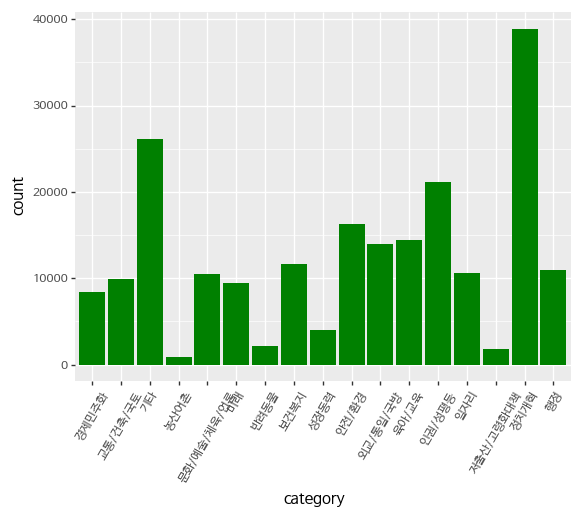

<ggplot: (298888168)>

In [31]:
from plotnine import *

(ggplot(df)
 + aes('category')
 + geom_bar(fill='green')
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=60))
)

In [ ]:
!pip install plotnine